In [27]:
%matplotlib inline

In [1]:
!conda env list

# conda environments:
#
kaggle                   C:\Tools\Anaconda3\envs\kaggle
base                     c:\Tools\Anaconda3
c3fw                  *  c:\Tools\Anaconda3\envs\c3fw
kaggle                   c:\Tools\Anaconda3\envs\kaggle
prime                    c:\Tools\Anaconda3\envs\prime



In [18]:
from IPython.display import display, Image

In [69]:
import os
import cv2
import pafy
import time
from datetime import datetime, timedelta
from pathlib import Path

import matplotlib.pyplot as plt

In [53]:
cwd = Path(os.getcwd())
data_path = cwd / 'datasets' / 'shibuya'

In [49]:
os.makedirs(data_path, exist_ok=True)

In [59]:
now = datetime.now()
now.replace(second=0, microsecond=0) + timedelta(minutes = 1)
now.second

45

In [73]:
def delta_to_next_minutes():
    return 60 - datetime.now().second

In [74]:
delta_to_next_minutes()

47

In [70]:
time.sleep(3)

In [50]:
!dir datasets

 Volume in drive C is Blade
 Volume Serial Number is D869-FC23

 Directory of C:\Data\Github\C-3-Framework\datasets

04/01/2020  16:30    <DIR>          .
04/01/2020  16:30    <DIR>          ..
04/01/2020  10:46    <DIR>          GCC
04/01/2020  10:46             1,492 get_density_map_gaussian.m
04/01/2020  10:46    <DIR>          Mall
04/01/2020  10:46    <DIR>          QNRF
04/01/2020  10:46    <DIR>          SHHA
04/01/2020  10:46    <DIR>          SHHB
04/01/2020  16:30    <DIR>          shibuya
04/01/2020  10:46    <DIR>          UCF50
04/01/2020  10:46    <DIR>          UCSD
04/01/2020  10:46    <DIR>          WE
04/01/2020  10:46                 0 __init__.py
               2 File(s)          1,492 bytes
              11 Dir(s)  375,669,805,056 bytes free


In [32]:
url = 'https://youtu.be/qp5AYspqqV0'#'https://youtu.be/NRiJ1KUjijA'
vPafy = pafy.new(url)

In [34]:
vPafy.allstreams

[normal:mp4@256x144,
 normal:mp4@426x240,
 normal:mp4@640x360,
 normal:mp4@854x480,
 normal:mp4@1280x720]

In [35]:
vPafy.getbest()

normal:mp4@1280x720

In [36]:
best = vPafy.getbest().url

In [78]:
cap = cv2.VideoCapture(best)

In [79]:
cap.get(cv2.CAP_PROP_FPS)

60.0

In [38]:
ret,frame = cap.read()
cv2.imshow('frame',frame)

In [39]:
frame.shape

(720, 1280, 3)

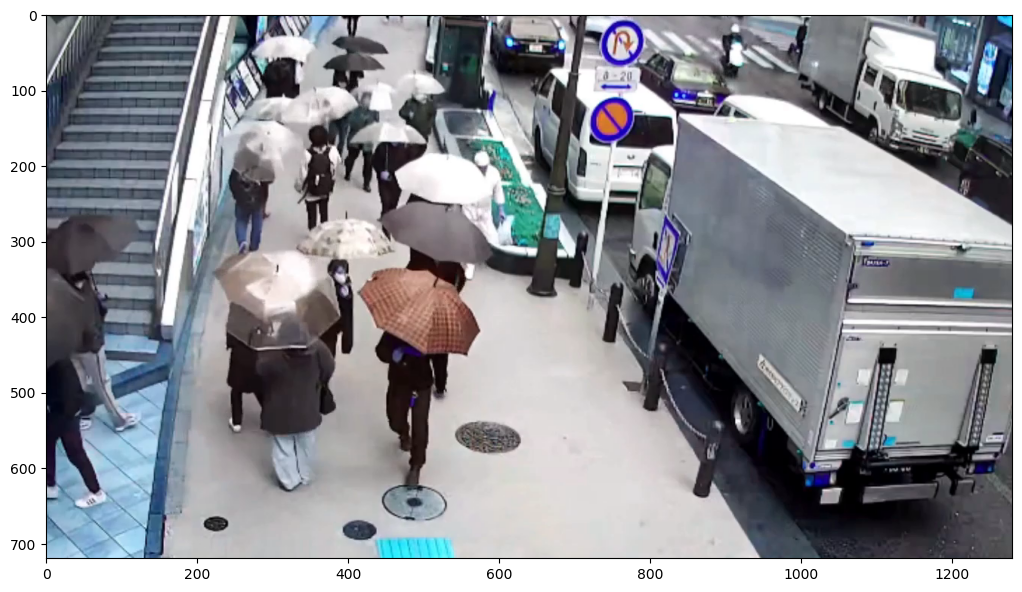

In [55]:
plt.figure(figsize=(1280/100, 720/100), dpi=100)
plt.imshow(frame)
plt.savefig(data_path/'test.png', dpi=100)
plt.show()
plt.close()

In [80]:
cap.release()

In [95]:
url = 'https://youtu.be/_11BYUkE5Rk' # https://youtu.be/qp5AYspqqV0
vPafy = pafy.new(url)
play = vPafy.getbest()

#start the video

for _ in range(10):
    filename = 'shibuya_scramble_{0}'.format(datetime.today().strftime('%Y-%m-%d-%H-%M-%S'))
    cap = cv2.VideoCapture(play.url)
#     cap.set(cv2.CAP_PROP_BUFFERSIZE, 0)
    cap.grab()
    ret,frame = cap.retrieve()
    cap.release()
    print(filename, ret)
    
    plt.figure(figsize=(1280/100, 720/100), dpi=100)
    plt.imshow(frame)
    plt.savefig(data_path/f'{filename}.jpg', dpi=100)
    plt.close()
    
    time.sleep(5)
    
#     time.sleep(delta_to_next_minutes())


cv2.destroyAllWindows()

shibuya_scramble_2020-04-01-18-49-00 True
shibuya_scramble_2020-04-01-18-49-05 True
shibuya_scramble_2020-04-01-18-49-11 True
shibuya_scramble_2020-04-01-18-49-17 True
shibuya_scramble_2020-04-01-18-49-23 True
shibuya_scramble_2020-04-01-18-49-29 True
shibuya_scramble_2020-04-01-18-49-35 True
shibuya_scramble_2020-04-01-18-49-40 True
shibuya_scramble_2020-04-01-18-49-46 True
shibuya_scramble_2020-04-01-18-49-52 True


In [90]:
from PIL import Image

In [99]:
!dir "C:/Data/Github/C-3-Framework/shibuya_scramble"

 Volume in drive C is Blade
 Volume Serial Number is D869-FC23

 Directory of C:\Data\Github\C-3-Framework\shibuya_scramble

04/01/2020  18:53    <DIR>          .
04/01/2020  18:53    <DIR>          ..
04/01/2020  18:52    <DIR>          pred
04/01/2020  18:52             7,629 shibuya_scramble_2020-04-01-18-49-00_pred_18.111722412109376.png
04/01/2020  18:52             8,102 shibuya_scramble_2020-04-01-18-49-05_pred_19.457032470703126.png
04/01/2020  18:52             6,982 shibuya_scramble_2020-04-01-18-49-11_pred_14.3130029296875.png
04/01/2020  18:52             6,888 shibuya_scramble_2020-04-01-18-49-17_pred_13.630782470703124.png
04/01/2020  18:52             6,944 shibuya_scramble_2020-04-01-18-49-23_pred_17.783172607421875.png
04/01/2020  18:52             6,181 shibuya_scramble_2020-04-01-18-49-29_pred_14.6762255859375.png
04/01/2020  18:52             6,181 shibuya_scramble_2020-04-01-18-49-35_pred_14.6762255859375.png
04/01/2020  18:52             7,069 shibuya_scramble_202

In [100]:
img_org = Image.open('C:/Data/Github/C-3-Framework/datasets/shibuya_scramble/img/shibuya_scramble_2020-04-01-18-49-46.jpg')
img_pred = Image.open('C:/Data/Github/C-3-Framework/shibuya_scramble/shibuya_scramble_2020-04-01-18-49-46_pred_24.png')

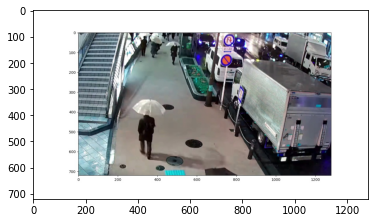

In [94]:
plt.imshow(img)
plt.show()
plt.close()

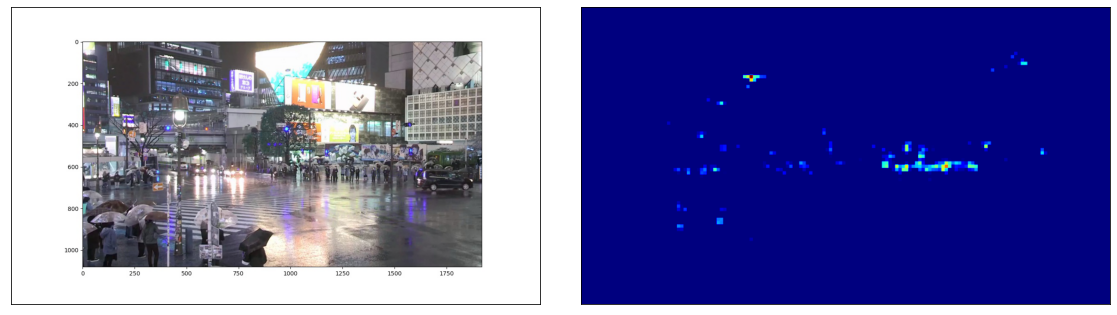

In [108]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(16, 8)
fig.tight_layout()
axes[0].imshow(img_org)
axes[1].imshow(img_pred)
for ax in axes:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    
plt.show()
plt.close()